<a href="https://colab.research.google.com/github/Srinithimahalakshmi/Data_science/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Ice Cream (1).csv to Ice Cream (1) (2).csv


In [ ]:
df=pd.read_csv("/content/Ice Cream (1) (1).csv")

In [ ]:
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


In [ ]:
df.isnull().sum()

,0
Temperature,0
Revenue,0


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [28]:
X=df['Temperature']
Y=df['Revenue']

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [52]:
linmodel=LinearRegression()
linmodel.fit(np.array(X_train).reshape(-1,1),Y_train)

LinearRegression()

In [53]:
Y_predict=linmodel.predict(np.array(X_test).reshape(-1,1))

In [42]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = mse ** 0.5
r2=r2_score(Y_test,Y_predict)

In [43]:
print(f"Mean squared Error:{mse}")
print(f"Root Mean squared Error:{rmse}")
print(f"R-squared:{r2}")


Mean squared Error:652.4938284912412
Root Mean squared Error:25.543958747446354
R-squared:0.9771509516333023


In [38]:
Y.map({"yes": 1, "no": 0})

,Revenue
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
495,NaN
496,NaN
497,NaN
498,NaN


In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(np.array(X).reshape(-1,1))

In [65]:
logmodel=LogisticRegression(max_iter=2000, solver='lbfgs')
logmodel.fit(np.array(X_train).reshape(-1,1),Y_train)


LogisticRegression(max_iter=2000)

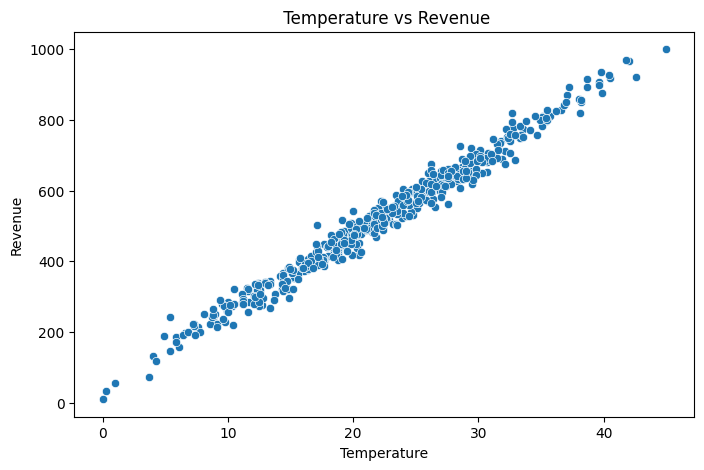

In [81]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Temperature", y="Revenue", data=df)
plt.title(" Temperature vs Revenue")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.show()

In [66]:
Y_predict=logmodel.predict(np.array(X_test).reshape(-1,1))

In [86]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
accuracy=accuracy_score(Y_test,Y_predict)
print("Accuracy:",accuracy)

Accuracy: 0.04


In [85]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score

precision = precision_score(Y_test, Y_predict, average='macro', zero_division=0)
recall = recall_score(Y_test, Y_predict, average='macro', zero_division=0)
print("Precision:",precision)
print("Recall:",recall)

Precision: 0.009405940594059406
Recall: 0.0297029702970297


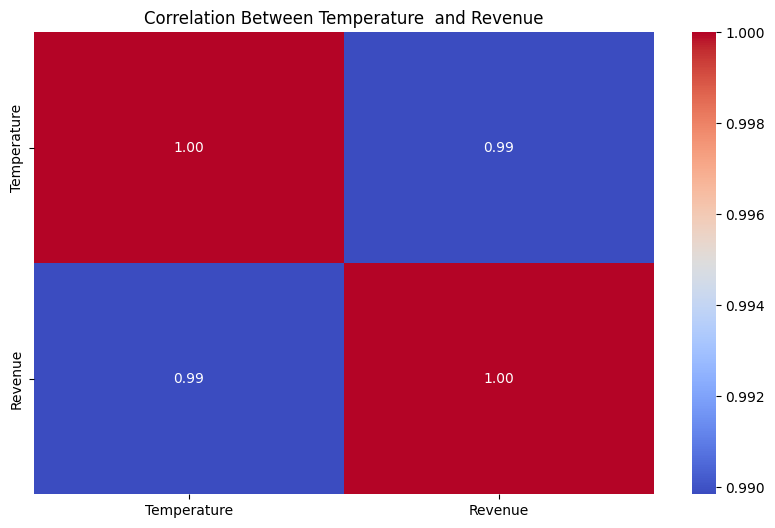

In [80]:
plt.figure(figsize=(10, 6))
corr = df[["Temperature"]+ ["Revenue"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Temperature  and Revenue")
plt.show()